<a href="https://colab.research.google.com/github/hank199599/data_science_from_scratch_reading_log/blob/main/Chapter20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 集群 (Clusering) → 非監督式學習(unsupervised learning)
沒有哪一種區分方式是一定正確的，  
區分方式端看是否符合區分者的**需求**而定。

# 模型
每個都是d維空間的一個向量，  
世個資料點分配到人個集群中,方法非常 之多,這也就表示要找出最佳化的集 是一個非常国離的問題,我們經常會採用一種送代演算法,它通常可以得出相然不 群是 :

1. 一開始先從維空即中選出k個資料點,做為集群的大平均值(k-means).
2. 把其餘的部個資料點,分配給距離最近的平均值。
3. 如果資科點的分配結集已裡不再變動,就停止下來,並以目前分配的集非故乡作奖 4.如果分配结果仍在變動,就重新計算平均值,然後回到步。2.

只要運用「第4章:線性代數」的 Vector_mean 函式,建立一個物件類別來進行這項工作 整件事就變得提孤單了,

In [1]:
from typing import List

Vector = List[float]

def num_differences(v1:Vector,v2:Vector)->int:
  assert len(v1) == len(v2)
  return len([x1 for x1,x2 in zip(v1,v2) if x1 != x2])

def scalar_multiply(c:float,v:Vector) -> Vector:
  return [c*v_i for v_i in v]

def vector_sum(vectors:List[Vector]) -> Vector:
  #先檢查vertors這個向量列表是否為空
  assert vectors,"列表中沒有向量!"

  #檢查vertors 向量列表內的所有向量都具有相同的維度
  num_elements=len(vectors[0])
  assert all(len(v)==num_elements for v in vectors),"向量維度不一致"

  #所有vectors[i]相加起來，是結果的第i個元素值
  return [sum(vector[i] for vector in vectors) for i in range(num_elements)]

def subtrate( v:Vector, w:Vector) -> Vector:
  assert len(v) == len(w) #兩個向量必須有相同的維度

  return [ v_i-w_i for v_i,w_i in zip(v,w)]

def sum_of_squares(v:Vector) -> float:
  return dot(v,v)

def dot(v:Vector,w:Vector)->float:
  #計算v_1*w_1+... +v_n*w_n
  assert len(v)==len(w),"兩個向量必須有相同的維度"

  return sum(v_i*w_i for v_i,w_i in zip(v,w))

In [2]:
assert num_differences([1,2,3],[2,1,3]) == 2

In [3]:
assert num_differences([1,2],[1,2]) == 0

### 建立函式：  
* 給定一堆向量以及各向量所對應的集群 → 計算各集群的平均值

In [4]:

def vector_mean(vectors:List[Vector])->Vector:
  n=len(vectors)
  return scalar_multiply(1/n,vector_sum(vectors))

def cluster_means(k:int,inputs:List[Vector],assignments:List[int]) ->List[Vector]:

  # clusters[i] 包含的是分配給集群i的輸入資料點
  clusters = [[] for i in range(k)]

  for input,assignment in zip(inputs,assignments):
    clusters[assignment].append(input)
  
  # 如果集群是空的，就用一個隨機點來做為其代表
  return [vector_mean(cluster) if cluster else random.choice(inputs) for cluster in clusters]

### 集群處理的程式碼

In [5]:
import itertools
import random
import tqdm

def squared_distance(v:Vector,w:Vector) -> float:
  return sum_of_squares(subtrate(v,w))

In [6]:
class KMeans:
  def __init__(self,k:int)->None:
    self.k = k
    self.means = None
  
  def classify(self,input:Vector)->int:
    """送回最接近輸入的集群索引值"""
    return min(range(self.k),key=lambda i:squared_distance(input,self.means[i]))
  
  def train(self,inputs:List[Vector])->None:
    # 一開始先以隨機的方式，把輸入分配到各個集群中
    assignments = [random.randrange(self.k) for _ in inputs]

    with tqdm.tqdm(itertools.count()) as t:
      for _ in t:
        # 計算平均值並找出新的集群分配結果
        self.means = cluster_means(self.k,inputs,assignments)
        new_assigments = [self.classify(input) for input in inputs]

        # 檢查有幾個分配結果出現變化，並判斷是否已經完成
        num_changed = num_differences(assignments,new_assigments)
        if num_changed == 0:
          return
        
        # 如果尚未完成，就繼續重新分配集群，並計算新的平均值
        assignments = new_assigments
        self.means = cluster_means(self.k,inputs,assignments)
        t.set_description(f"change:{num_changed} / {len(inputs)}")

# 範例：聚會

### 圖 20-1 你家鄉使用者的所在位置分布
根據不同的觀察角度，可以看出有兩、三個集群。

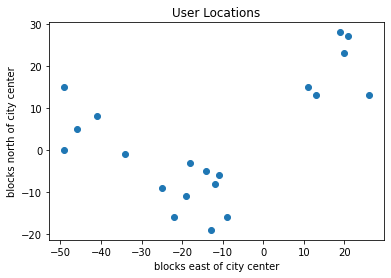

In [7]:
from matplotlib import pyplot as plt

inputs: List[List[float]] = [[-14,-5],[13,13],[20,23],[-19,-11],[-9,-16],[21,27],[-49,15],[26,13],[-46,5],[-34,-1],[11,15],[-49,0],[-22,-16],[19,28],[-12,-8],[-13,-19],[-41,8],[-11,-6],[-25,-9],[-18,-3]]

xs = [row[0] for row in inputs]
ys = [row[1] for row in inputs]

plt.scatter(xs,ys)
plt.title("User Locations")
plt.xlabel("blocks east of city center")
plt.ylabel("blocks north of city center")
plt.show()

進行測試

In [8]:
random.seed(12)
clusterer = KMeans(k=3)
clusterer.train(inputs)
means = sorted(clusterer.means)

assert len(means) == 3

change:5 / 20: : 0it [00:00, ?it/s]


檢查平均值是否接近我們的預期

In [9]:
assert squared_distance(means[0],[-44,5]) < 1
assert squared_distance(means[1],[-16,-10]) < 1
assert squared_distance(means[2],[18,20]) < 1

### 圖 20-2 使用者所在的位置，被分成三個集群
![pic 20-2](https://lh3.googleusercontent.com/0MZcUSp-2iiiBPRFzfImHrmi5UPkGY1Squ1HiSG7To9Tp8iHLOC3yjwnPpPDQZ1RXc_x3zcY_apnF6GKWbbHUFfWnq-rDDZPxD6eLkQGVXSQlUMErNYfZKnIMiToSNjnXfL4PfDuKQu2n3tah7LLWagjpgxX3RKbxCzs7Eoak6x4zO1_pHUkuSo7X8XzYlf4_fkSWYtleYsL79_8C97esPu5WR-DBSsognKdgMzvzdB-buw29pPvxrYlqBsX6a90FHqY4MQ5w3yKbhxotzXoIxWVp1819jrbAO6bVcjUTkVUt7-_Jj2lGXO-KkbBJq910rnSW6XJrzDLjoVS2vg4md56tUsuXGSHSfotf9fTx_krRjmnGvjN9bOcT9fNLE8nrlPeLCuIFELHwKKClF_qrFlBBjSXY0tx_sPF7F_WZGjc4YI3H19w73nbzxRzil-Bsc6mV2D0ki-0Xsat5w9lemtmSR69Qf5KJtZugabConiQFEG4DegrOoRNFhz9ftOa9rYpK-qZaqjO6QSmHzTWCoZdiM6uosUozLccR-uYGYZ4mY3Wi3-q3R26kijtrPOZlYJwtSw4mjtvOKsmXkoaisDVcx-6FUJvIDUhytxbkUotgbfOCpQBxIrC5w1es_m6gEaB1Uhek4FtQhWbEW5zg6aGMpG550yE5LsdnBWKH32mTSaQzAxg29dQbIKB7A=w706-h562-no?authuser=0)

改成只找出兩個集群的中心位置

In [10]:
random.seed(12)
clusterer = KMeans(k=2)
clusterer.train(inputs)
means = sorted(clusterer.means)

assert len(means) == 2

change:1 / 20: : 0it [00:00, ?it/s]


檢查平均值是否接近我們的預期

In [11]:
assert squared_distance(means[0],[-26,-5]) < 1
assert squared_distance(means[1],[18,20]) < 1

### 圖 20-3 使用者所在的位置，被分成兩個集群
![pic 20-3](https://lh3.googleusercontent.com/lvKKN51c73R5yfpc2R7wmR-e5F9r0Anb7fPKwW3XnH9YVQ-laGj0OOMmkC5r4LSIuol9EjvHTW18EwRct9Bd4KrHvd6wL7aurO8Fmllu0dPIw12IdERXRWFjmkCdkNUuH8P2-pAij8eacPLBIs9NLuD9FwAtMcOT9f2g-_v0yzkJPN_oBkTmavLoiCc8R7ynG89sYX7nU4Cjz7xNuhI_ds4Y2yzDQCByBZSs0SjxiLYnpK5qDLq43Y21wGR5I6H8-ACY0DV2BBAseauIFz08lLrFaJkgDyMBIeRRmN3v31xzhO7NORCNNTwhAP70XM8K5Y6qg5QqCcOu51e8yMpuLOPnOCrg1V9GxTs9aE4rIcatPVcoqAOBf9ATgtlwTQJRnqFnghomCGtTeCicYEGK51RuSl2ee_ZkMDRuMQKNFRyqWh8Mzf5sSGp7wrLh2rZ3eiQDxupcKSUoG1XSVJRuzHqn3g_jNGp1vycMdGEyAYNX30bJBZ00LZhvk9kH2d7HjGhfnAbMBVzDGbNig9Wbx2mJz0E5OvKYyw6kd0frYG2L3sgB54PorbaxE2mXet2Ib-C9x84R78wEtMFxcLwUL1MsVSsE7dDch8VS5jdvXkSp4WgpozNEV51tDo-BuQbNfht_LJkiGQQK-mMI3i46Ei8GqoHpadDok7ZRToHIkjhvawgwpPgIwyhgXm45Ug=w706-h562-no?authuser=0)

# k的選擇
k的選擇易受到人為控制外的因素影響。  
而較為合理的作法是將誤差平方和表示為k的函數並以圖形匯出。

In [12]:
from matplotlib import pyplot as plt 

def squared_clustring_errors(inputs:List[Vector],k:int) -> float:
  """計算每個輸入與相應集群k-平均值之間的誤差平方和"""
  clusterer =KMeans(k)
  clusterer.train(inputs)
  means = clusterer.means
  assignments = [clusterer.classify(input) for input in inputs]

  return sum(squared_distance(input,means[cluster]) for input,cluster in zip(inputs,assignments))

### 圖 20-4 k的選擇
套用先前的例子

0it [00:00, ?it/s]
change:3 / 20: : 0it [00:00, ?it/s]
change:2 / 20: : 0it [00:00, ?it/s]
change:3 / 20: : 0it [00:00, ?it/s]
change:1 / 20: : 0it [00:00, ?it/s]
change:7 / 20: : 0it [00:00, ?it/s]
change:1 / 20: : 0it [00:00, ?it/s]
change:1 / 20: : 0it [00:00, ?it/s]
change:1 / 20: : 0it [00:00, ?it/s]
change:7 / 20: : 0it [00:00, ?it/s]
change:2 / 20: : 0it [00:00, ?it/s]
change:2 / 20: : 0it [00:00, ?it/s]
change:4 / 20: : 0it [00:00, ?it/s]
change:8 / 20: : 0it [00:00, ?it/s]
change:2 / 20: : 0it [00:00, ?it/s]
change:1 / 20: : 0it [00:00, ?it/s]
change:11 / 20: : 0it [00:00, ?it/s]
change:1 / 20: : 0it [00:00, ?it/s]
change:1 / 20: : 0it [00:00, ?it/s]
change:1 / 20: : 0it [00:00, ?it/s]


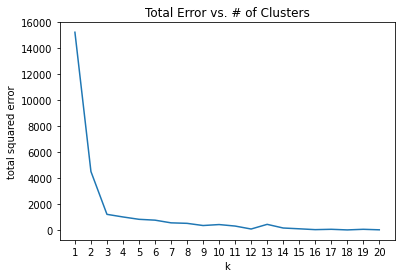

In [13]:
# 從1往上到len(inputs)，劃出不同集群數量所對應的圖形
ks = range(1,len(inputs)+1)
errors = [squared_clustring_errors(inputs,k) for k in ks]

plt.plot(ks,errors)
plt.title("Total Error vs. # of Clusters")
plt.xlabel("k")
plt.ylabel("total squared error")
plt.xticks(ks)
plt.show()

### 範例：對顏色進行集群分析 
建立一個五色版圖片：
1. 選出五種顏色 → 利用 k-平均值 做集群分析
2. 針對每個像素，從這五種顏色之中指定其中一種顏色


載入圖片的方法

In [14]:
!pip install pillow

使用 matlibplot.image.imread

In [15]:
from skimage import io
import matplotlib.image as mping

img = mping.imread("https://upload.wikimedia.org/wikipedia/commons/thumb/5/58/Shiba_inu_taiki.jpg/800px-Shiba_inu_taiki.jpg", format="jpg")/256

top_row = img[0]
top_lest_pixel = top_row[0]
red,green,blue = top_left_pixel

FileNotFoundError: ignored

將所有像素轉變為被展平後的列表

In [ ]:
pixels = [pixel.tolist() for row in img for pixel in row]

將資料送進clusterer之中

In [ ]:
clusterer = KMeans(5)
clusterer.train(pixels)

完成後，依據相同的格式建立一張新的圖片

In [ ]:
def recolor(pixel:Vector) ->Vector:
  cluster = xlusterer.classify(pixel)
  return clusterer.means[cluster]

new_img = [[recolor(pixel) for pixel in row] for row in img]

plt.imshow(new_img)
plt.axis('off')
plt.show()

# 由上而下階層式分群法